Epoch: 69


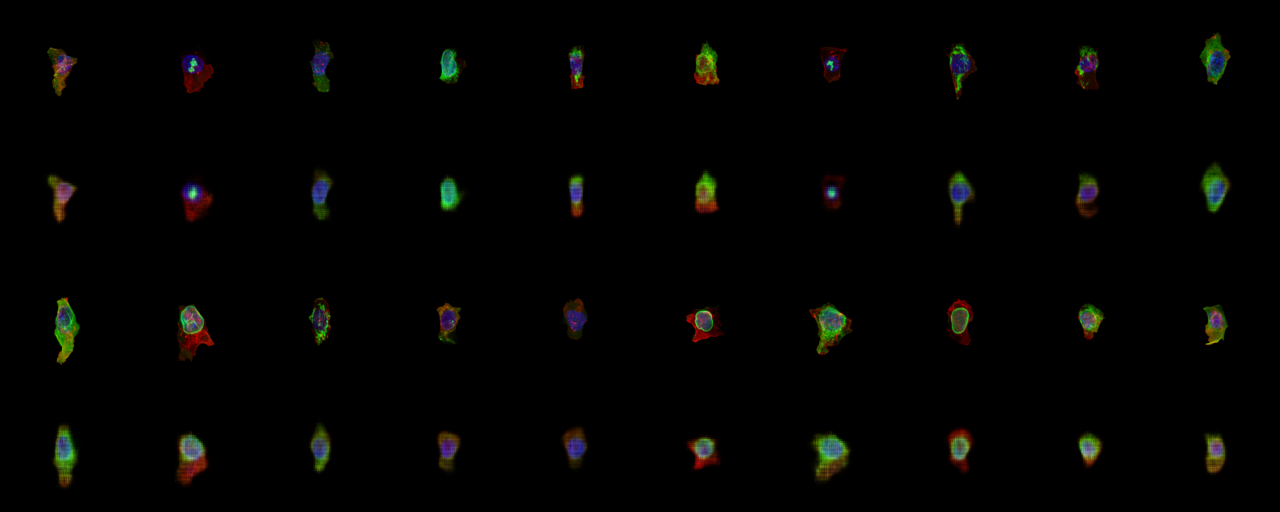

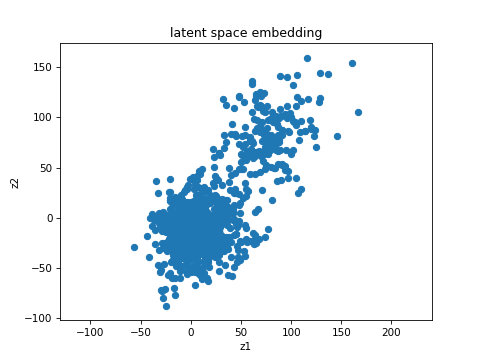

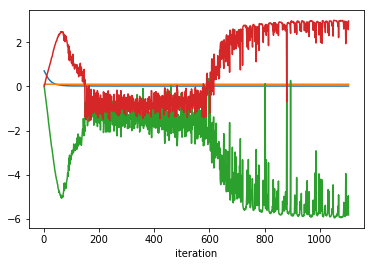

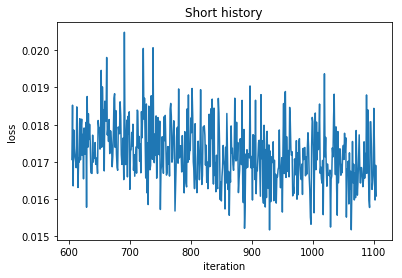

In [252]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

model_dir = './waaegan/'
model_dir = './semi_waaegan/'


history = 500

# opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger.pkl'.format(model_dir), "rb" ) )

epoch = max(logger.log['epoch'])

print('Epoch: ' + str(epoch))

plt.figure(1)
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['encDLoss'])
plt.plot(logger.log['iter'], logger.log['decDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxDecDLoss'])
# plt.ylim([-4, 4]) 
plt.xlabel('iteration')


plt.figure(2)
plt.plot(logger.log['iter'][-history:], logger.log['reconLoss'][-history:])

plt.title('Short history')
plt.xlabel('iteration')
plt.ylabel('loss')






im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))

im_embed_path = '{0}/embedding_{1}.png'.format(model_dir, epoch)
display(Image(im_embed_path,  unconfined=True))





# plt.xlim([-4, 4]) 
# plt.ylim([-4, 4])     
# plt.axis('equal')
# plt.xlabel('z_1')
# plt.ylabel('z_2')
# display.clear_output(wait=True)
# display.display(plt.gcf()) 
# img = Image.open(image_path)

In [9]:
logger.fields


('epoch', 'iter', 'reconLoss', 'minimaxLoss', 'advLoss', 'time')